# Descripción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
Este conjunto de datos particular fue lanzado públicamente por Instacart en 2017 para una competición Kaggle. Los datos reales pueden descargarse directamente de la página de la competición Kaggle.

# Objetivo

Limpiar los datos y preparar un reporte que brinde información sobre los hábitos de compra de los clientes de Instacart.

Para cumplir con el objetivo del proyecto, se dividirá el informe en tres 3 pasos:
1. Descripción de los datos
2. Preprocesamiento de los datos
3. Análisis de los datos

## Diccionario de datos

Hay cinco tablas en el conjunto de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

## Plan de solución
Leer los datos con la función `read_csv()` e identificar si es necesario modificar los valores de los parámetros que vienen de default, para una correcta lectura de los datos.

In [2]:
# Importar librerías
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
# leer conjuntos de datos en los DataFrames
'''
df_orders se asigna a los datos de instacart_orders.cvs

df_productos se asigna a los datos de products.csv

df_aisles se asigna a los datos de aisles.csv

df_departments se asigna a los datos de department.cvs

df_orders_products se asigna a los datos de order_products.cvs
'''

# Se utiliza el parámetro "sep = ';'" ya que ";" es utilizado como delimitador.

df_orders = pd.read_csv('instacart_orders.csv', sep = ';') 

df_products = pd.read_csv('products.csv', sep = ';')

df_aisles = pd.read_csv('aisles.csv', sep = ';')

df_departments = pd.read_csv('departments.csv', sep = ';')

df_order_products = pd.read_csv('order_products.csv', sep = ';')

In [4]:
# Mostrar información del DataFrame
display(df_orders.head())
df_orders.info()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# Mostrar información del DataFrame
display(df_products.head())
df_products.info()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# Mostrar información del DataFrame
display(df_aisles.head())
df_aisles.info()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# Mostrar información del DataFrame
display(df_departments.head())
df_departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [8]:
# Mostrar información del DataFrame

#pd.set_option("display.max_info_rows", 4600000) # Debido a que el archvio tiene muchas filas se modificó "display.max_info_rows" a 4´600,000 para poder ver el non-null count.
#print(pd.get_option("display.max_info_rows")) # Se utiliza para verificar que el cambió anterior fue correcto.

display(df_order_products.head())
df_order_products.info(show_counts = True) #Se utiliza el parámetro "show_counts = True" para mostrar la columna "Non-Null Count" en la salida.

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


**Se puede observar que para el caso de:**
- **En el dataFrame "df_orders" se observa que existen valores ausentes en la columna "days_since_prior_order" y el tipo de dato para esta columna sería mejor "int" en lugar de "float"; el resto de tipos de datos son coherentes.**


- **En el dataFrame "df_products" se observa que no hay valores ausentes y los tipos de datos son coherentes.**


- **En el dataFrame "df_aisles" se observa que no hay valores ausentes y los tipos de datos son coherentes.**


- **En el dataFrame "df_departments" se observa que no hay valores ausentes y los tipos de datos son coherentes.**


- **En el dataFrame "df_order_products" se observa que existen valores ausentes en la columna "add_to_cart_order" y el tipo de dato para esta columna sería mejor "int" en lugar de "float"; el resto de tipos de datos son coherentes.**

# Paso 2. Preprocesamiento de los datos

Se preprocesan los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

## Plan de solución
Para encontrar los valores ausentes se utilizaran los métodos `isna()` para contar los valores ausentes en las columnas identificadas durante la lectura de los datos y `fillna()` en caso de ser necesario el llenado de esos valores por alguno en específico.

Se utilizan los métodos los `duplicated()`, `drop_duplicates()`, `unique()` y `nunique()` para poder encontrar y corregir los valores duplicados.

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(df_orders['order_id'].duplicated().sum())
display(df_orders[df_orders['order_id'].duplicated()])

15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


**Al parecer hay 15 líneas duplicadas y tienen en común que fueron relizadas el miércoles a las 2 horas del día.**

In [10]:
# Verificar todos los pedidos que se hicieron el miércoles a las 2:00 a.m.

display(df_orders.query('order_dow == 3 and order_hour_of_day == 2').shape)
display(df_orders.query('order_dow == 3 and order_hour_of_day == 2')['order_id'].nunique())

(121, 6)

106

**Al parecer fue un error puntual del sistema, lo cual se puede comprobar porque hay 106 pedidos que cumplen con el criterio de haberse hecho en miércoles a las 2:00 a.m.; por lo tanto se requieren eliminar dichas líneas duplicadas.**

In [11]:
# Eliminar los pedidos duplicados
df_orders = df_orders.drop_duplicates().reset_index(drop = True) # Se eliminan las filas duplicadas y se utiliza el método "reset_index()" con el parámetro "drop = True" para reiniciar los índices y eliminar los antiguos del DataFrame.

In [12]:
# Vuelve a verificar si hay filas duplicadas
print(df_orders.duplicated().sum()) # Se verifica la cantidad de líneas duplicadas presentes en el DataFrame.

0


In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(df_orders['order_id'].duplicated().sum()) # Se verifica la cantidad de valores duplicados en la columna "order_id" del DataFrame.

0


**Se encontraron 15 líneas duplicadas, para verificar que efectivamente estaban duplicadas se filtraron por "order_id". Posteriormente se eliminaron dichas filas y se verificó de nuevo que no exitieran "order_id" duplicados. Cabe mencionar que se toma la decisión de eliminar las 15 filas duplicadas basada en la primicia de que fue un error puntual del sistema, ya que se verificó que hubo 106 pedidos que cumplen con el criterio de haberse hecho en miércoles a las 2:00 a.m.**

### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
display(df_products[df_products.duplicated()])
print(df_products.duplicated().sum())

,product_id,product_name,aisle_id,department_id


0


In [15]:
# Revisa únicamente si hay ID de departamentos duplicados
print(df_products['department_id'].duplicated().sum())
print(df_products['department_id'].nunique()) # Se verifica que sólo existen 21 diferentes departamentos.
print(df_products.product_id.duplicated().sum()) # Se verifica si existen "product_id" duplicados.

49673
21
0


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
df_products['product_name'] = df_products['product_name'].str.upper()
display(df_products[df_products['product_name'].duplicated()])
print(df_products['product_name'].duplicated().sum())
print(df_products['product_name'].nunique())
print(df_products['product_id'].nunique()) # Se verifica la cantidad total de diferentes "product_id".

,product_id,product_name,aisle_id,department_id
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
436,437,NaN,100,21
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


1361
48332
49694


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
display(df_products[~(df_products['product_name'].isna()) & df_products['product_name'].str.upper().duplicated()])
display(df_products[df_products.duplicated(subset = ['product_id', 'product_name'])]) # Se verifica que la combinación "product_id" y "product_name" es única y no existen valores duplicados.

,product_id,product_name,aisle_id,department_id
2058,2059,BIOTIN 1000 MCG,47,11
5455,5456,GREEN TEA WITH GINSENG AND HONEY,96,20
5558,5559,CREAM OF MUSHROOM SOUP,69,15
7558,7559,CINNAMON ROLLS WITH ICING,105,13
9037,9038,AMERICAN CHEESE SLICES,21,16
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


,product_id,product_name,aisle_id,department_id


**Se observan no hay filas duplicadas, sin embargo, al hacer un análisis más meticuloso se encontraron 49,673 valores duplicados referentes a los "department_id" y 1,361 referentes a los "product_name".**

**En función de los resultados anteriores se puede concluir que los datos duplicados referentes a "department_id" tienen sentido ya que existen varios productos que pertenecen al mismo departamento. Sin embargo, para el caso de los valores duplicados en la columna "product_name" son valores ausentes del tipo "NaN" y 104 son nombres repetidos, sin embargo no es necesario hacer ningún cambio ya que la combinación "product_id" y "product_name" es única y no existen valores duplicados.**

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print(df_departments.duplicated().sum())

0


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_departments['department_id'].duplicated().sum())

0


**Al parecer no se encontraron líneas duplicadas ni siquiera filtrando el DataFrame por la columna "deparment_id".**

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print(df_aisles.duplicated().sum())

0


In [21]:
# Revisa únicamente si hay IDs duplicadas de productos
print(df_aisles['aisle_id'].duplicated().sum())

0


**Al parecer no se encontraron líneas duplicadas ni siquiera filtrando el DataFrame por la columna "aisle_id".**

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print(df_order_products.duplicated().sum())

0


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
display(df_order_products[df_order_products.duplicated(subset = ['order_id', 'product_id'])]) # Se verifica utilizando el parámetro "subset = ['order_id', 'product_id']" que haya una combinación única para ambas columna.

,order_id,product_id,add_to_cart_order,reordered


**Todo parece indicar que no hay valores duplicadas en el DataFrame y se verifica con el último paso al momento se buscar valores duplicado entre las columnas "order_id" y "product_id" y se comprueba que hay solamente combinaciones únicas entre ambas columnas.**

Al trabajar con valores duplicados, se puede observar que también falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
display(df_products[df_products['product_name'].isna()])
print(df_products['product_name'].isna().sum())

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


1258


**Se pude observar que los datos de tipo "NaN" son 1,258 y se encuentran solamente en la columna "product_name", además están realcionados con el "aisle_id = 100" y el "department_id = 21".**

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
print(df_products[df_products['product_name'].isna()]['aisle_id'].unique())
display(df_products[(df_products['aisle_id'] == 100) & (df_products['product_name'].isna())]['product_id'].count())
display(df_aisles[df_aisles['aisle_id'] == 100])

[100]


1258

,aisle_id,aisle
99,100,missing


**Todos los nombres de los productos ausentes están relacionados con el pasillo 100 que está identificado como "missing".**

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
print(df_products[df_products['product_name'].isna()]['department_id'].unique())
display(df_products[(df_products['department_id'] == 21) & (df_products['product_name'].isna())]['product_id'].count())
display(df_departments[df_departments['department_id'] == 21])

[21]


1258

,department_id,department
20,21,missing


**Todos los nombres de los productos ausentes están relacionados con el departamento 21 que está identificado como "missing".**

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
display(df_aisles[df_aisles['aisle_id'] == 100])
display(df_departments[df_departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


**Ambos ID´s del pasillo (aisle) y del departamento (department) están identificados como "missing". Por lo tanto, esto indica que los nombres de los productos son desconocidos.**

In [28]:
# Completar los nombres de productos ausentes con 'Unknown'
df_products['product_name'].fillna('Unknown', inplace = True)
display(df_products[df_products['product_name'] == 'Unknown'])

,product_id,product_name,aisle_id,department_id
37,38,Unknown,100,21
71,72,Unknown,100,21
109,110,Unknown,100,21
296,297,Unknown,100,21
416,417,Unknown,100,21
...,...,...,...,...
49552,49553,Unknown,100,21
49574,49575,Unknown,100,21
49640,49641,Unknown,100,21
49663,49664,Unknown,100,21


**Se utilizó el método `fillna()` para modificar el nombre de los productos ausentes, con el parámetro `inplace = True` para evitar la reasignación de la variable.**

### `orders` data frame

In [29]:
# Encuentrar los valores ausentes
print(df_orders.isna().sum())
display(df_orders[df_orders['days_since_prior_order'].isna()])

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
...,...,...,...,...,...,...
478880,2589657,205028,1,0,16,NaN
478881,2222353,141211,1,2,13,NaN
478907,2272807,204154,1,1,15,NaN
478911,2499542,68810,1,4,19,NaN


In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(df_orders[(df_orders['days_since_prior_order'].isna()) & (df_orders['order_number'] != 1)].count())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


**Se observa que los valores ausentes en la columna "days_since_prior_order" indican que es el primer pedido del cliente y por tanto no existen datos para calcular los días desde que el cliente hizo el primer pedido.**

### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
print(df_order_products.isna().sum())
display(df_order_products[df_order_products['add_to_cart_order'].isna()])

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


**Se observa que los valores ausentes se encuentran en la columna "add_to_cart_order" y son 836 en total. Además, estos valores se encuentran distribuidos entre un rango de valores de 1 a 64 artículos agregados al carrito por pedido.**

In [33]:
# Guardar todos los IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
display(df_order_products[df_order_products['add_to_cart_order'].isna()])
order_ids_missing = df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id']
display(order_ids_missing.head())

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


737      2449164
9926     1968313
14394    2926893
16418    1717990
30114    1959075
Name: order_id, dtype: int64

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
# Contar el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.

display(df_order_products.query("order_id in @order_ids_missing").groupby('order_id').head())
display(df_order_products.query("order_id in @order_ids_missing").groupby('order_id')['product_id'].count().min())

#display(df_order_products[df_order_products['order_id'].isin(order_ids_missing)].groupby('order_id').head())
#display(df_order_products[df_order_products['order_id'].isin(order_ids_missing)].groupby('order_id')['product_id'].count().min())

,order_id,product_id,add_to_cart_order,reordered
267,2094761,31469,57.0,1
737,2449164,5068,NaN,0
1742,2997021,4920,37.0,0
3463,871281,40063,61.0,1
3535,171934,36397,7.0,0
...,...,...,...,...
607447,2170451,38200,18.0,1
650703,1916118,47766,32.0,1
722943,1598369,47335,59.0,1
838640,1598369,7631,4.0,1


65

**Se observa que al parecer hay un problema con el sistema ya que los pedidos que tienen más de 64 productos en "add_to_cart_order", el a partir de producto 65 se sustituye su valor por "NaN".**

In [35]:
# Remplazar los valores ausentes en la columna 'add_to_cart' con 999 y convierte la columna al tipo entero.
df_order_products['add_to_cart_order'].fillna(999, inplace = True)
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('int')
df_order_products.info(show_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype
---  ------             --------------    -----
 0   order_id           4545007 non-null  int64
 1   product_id         4545007 non-null  int64
 2   add_to_cart_order  4545007 non-null  int32
 3   reordered          4545007 non-null  int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB


**Al investigar detenidamente los valores ausentes en las columnas: "product_name" del DataFrame products, "days_since_prior_order" del DataFrame orders y "add_to_cart_order" del DataFrame order_productos, se encontraron algunos problemas con el sistema y al final se logró hacer la sustitución de dichos valores ausentes para corregir los DataFrames.**

# Paso 3. Análisis de los datos

## Análisis inicial

1. Verificar que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean coherentes (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### 1. Verifica que los valores sean sensibles

In [36]:
display(df_orders['order_hour_of_day'].sort_values().unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [37]:
display(df_orders['order_dow'].sort_values().unique())

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

**Se observa que ambas columnas oscilan de manera coherente entre los rangos de valores respectivos.**

### 2. Para cada hora del día, ¿cuántas personas hacen órdenes?

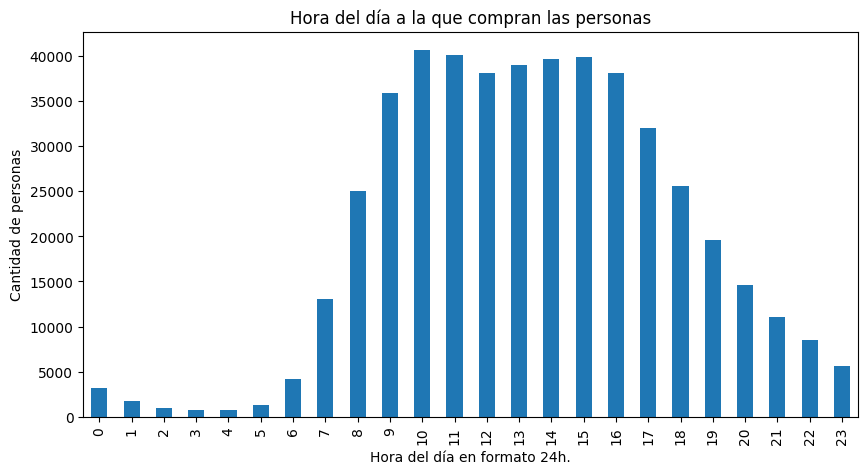

In [38]:
df_orders_grp_hod = df_orders.groupby(['order_hour_of_day'])['user_id'].count()
df_orders_grp_hod.plot(kind = 'bar',
                       y = 'user_id',
                       title = 'Hora del día a la que compran las personas',
                       xlabel = 'Hora del día en formato 24h.',
                       ylabel = 'Cantidad de personas',
                       figsize = [10,5],
                      )
plt.show()

**Se puede observa que a las 10 a.m. es cuando más personas hacen pedidos.**

### 3. ¿Qué día de la semana compran víveres las personas?

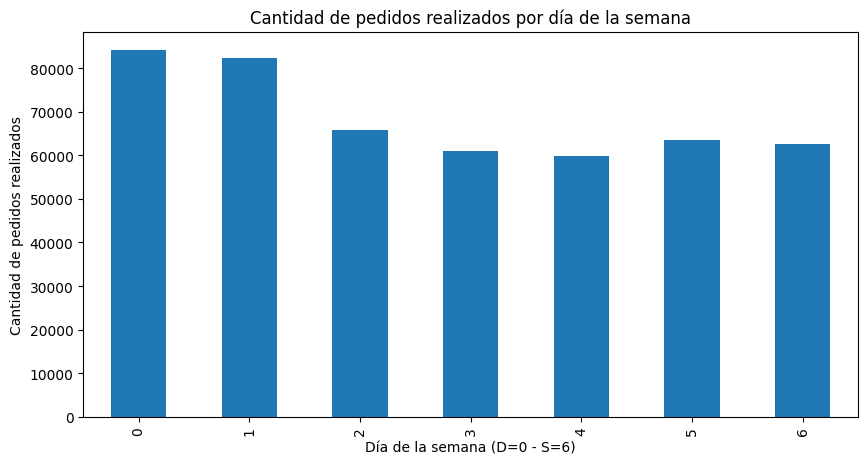

In [39]:
df_orders_grp_dow = df_orders.groupby('order_dow')['user_id'].count()
df_orders_grp_dow.plot(kind = 'bar',
                       title = 'Cantidad de pedidos realizados por día de la semana',
                       xlabel = 'Día de la semana (D=0 - S=6)',
                       ylabel = 'Cantidad de pedidos realizados',
                       figsize = [10,5],
                       legend = False
                      )
plt.show()

**Los días que las personas compran víveres son principalmente los domingos y lunes.**

### 4. ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

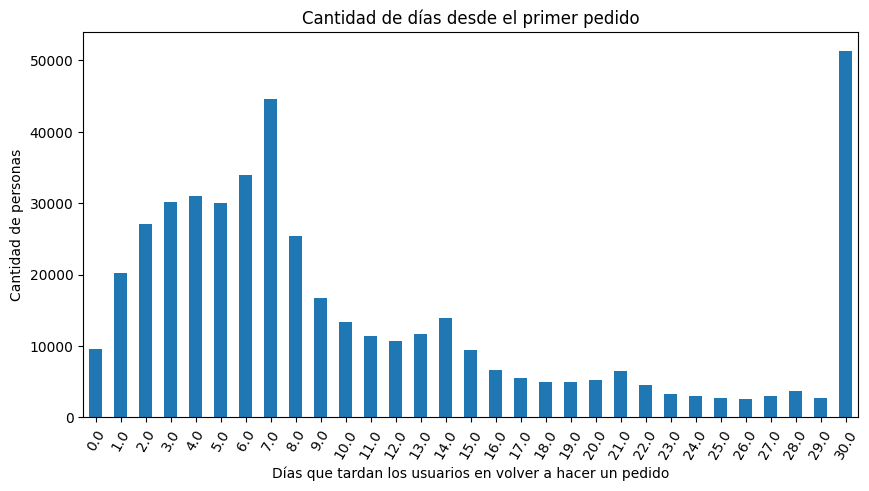

days_since_prior_order
26.0    2640
Name: user_id, dtype: int64

days_since_prior_order
30.0    51337
Name: user_id, dtype: int64

In [40]:
df_orders_grp_days = df_orders.groupby('days_since_prior_order')['user_id'].count()
df_orders_grp_days.plot(kind = 'bar',
                        title = 'Cantidad de días desde el primer pedido',
                        xlabel = 'Días que tardan los usuarios en volver a hacer un pedido',
                        ylabel = 'Cantidad de personas',
                        rot = 60,
                        figsize = [10,5],
                        legend = False
                       )
plt.show()
display(df_orders_grp_days[df_orders_grp_days == df_orders_grp_days.min()])
display(df_orders_grp_days[df_orders_grp_days == df_orders_grp_days.max()])

**Se observa que la mayoría de las personas tardan 30 días para volver a realizar un pedido, mientras la minoría sólo tarda 26 días.**

## Análisis intermedio

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Graficar la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### 1. Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [41]:
display(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478952 entries, 0 to 478951
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


None

In [42]:
df_hod_wed = df_orders[df_orders['order_dow'] == 3]['order_hour_of_day'].value_counts().sort_index()
df_hod_sat = df_orders[df_orders['order_dow'] == 6]['order_hour_of_day'].value_counts().sort_index()

In [43]:
df_hod = pd.concat([df_hod_wed, df_hod_sat], axis = 1)
df_hod.columns = ['Wednesday', 'Saturday']
display(df_hod)

,Wednesday,Saturday
order_hour_of_day,,
0,373,464
1,215,254
2,106,177
3,101,125
4,108,118
5,170,161
6,643,451
7,1732,1619
8,3125,3246


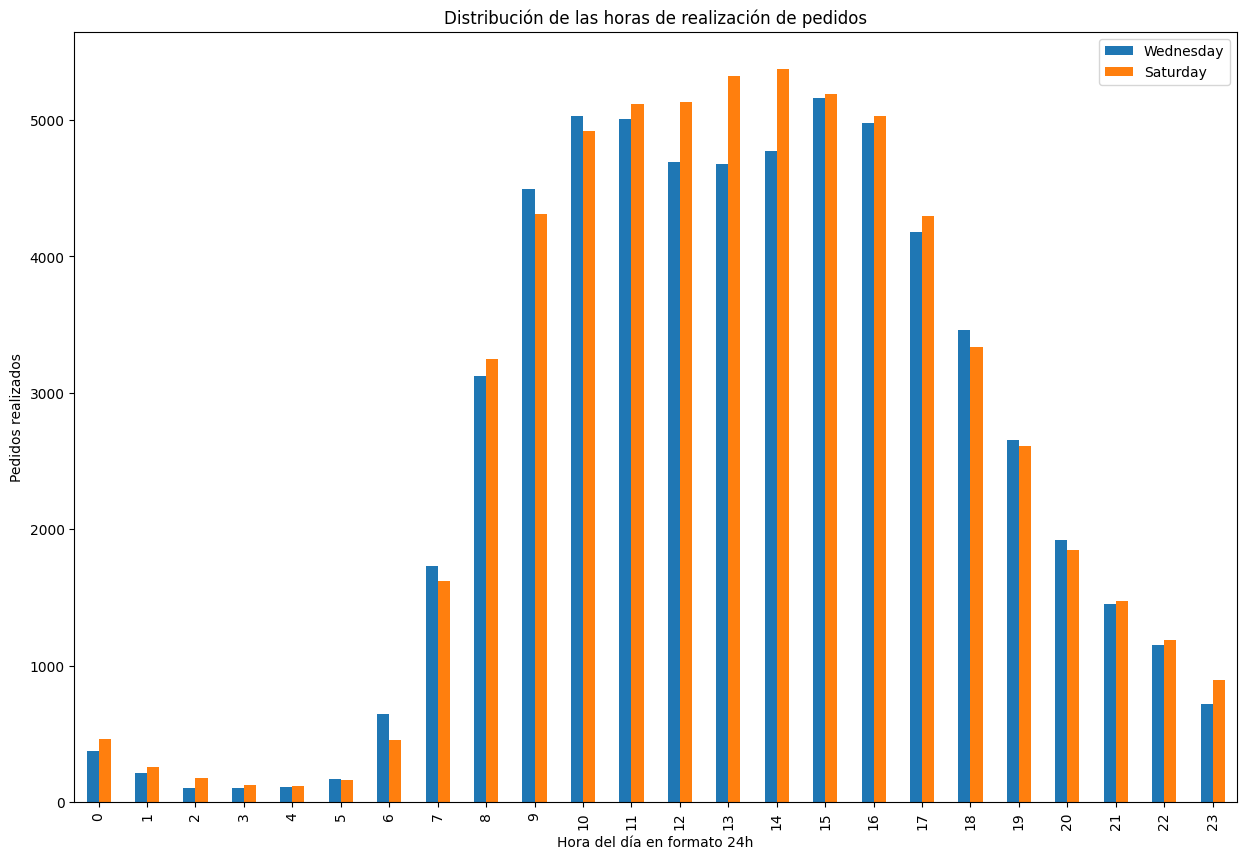

In [44]:
df_hod.plot(kind = 'bar',
            title = 'Distribución de las horas de realización de pedidos',
            xlabel = 'Hora del día en formato 24h',
            ylabel = 'Pedidos realizados',
            figsize = [15,10]
           )
plt.show()

**Se observa que de 11 a.m. a 2 p.m. se hacen más pedidos los sábados que los miércoles y el resto de las horas es muy similar para ambos días.**

### 2. ¿Cuál es la distribución para el número de pedidos por cliente?

In [45]:
df_orders_by_costumer = df_orders.groupby('order_number')['user_id'].count().sort_index()
display(df_orders_by_costumer)

order_number
1      28817
2      28633
3      28685
4      28703
5      25661
       ...  
96       220
97       221
98       191
99       169
100      194
Name: user_id, Length: 100, dtype: int64

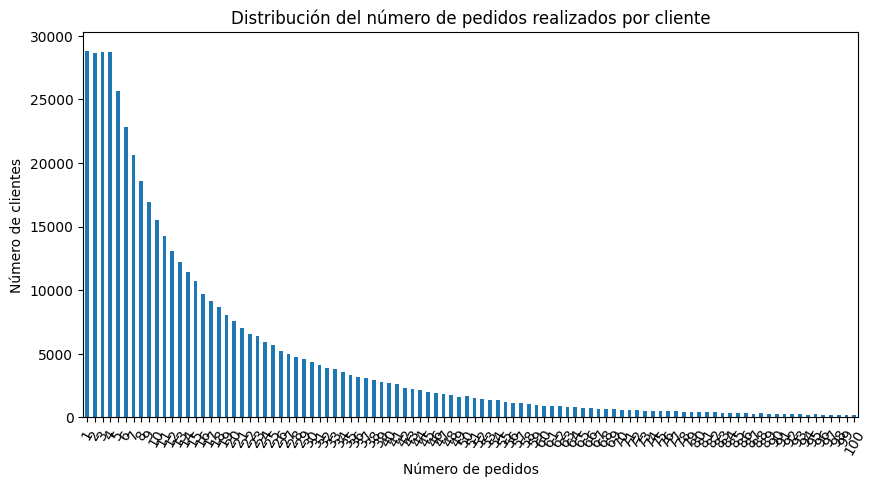

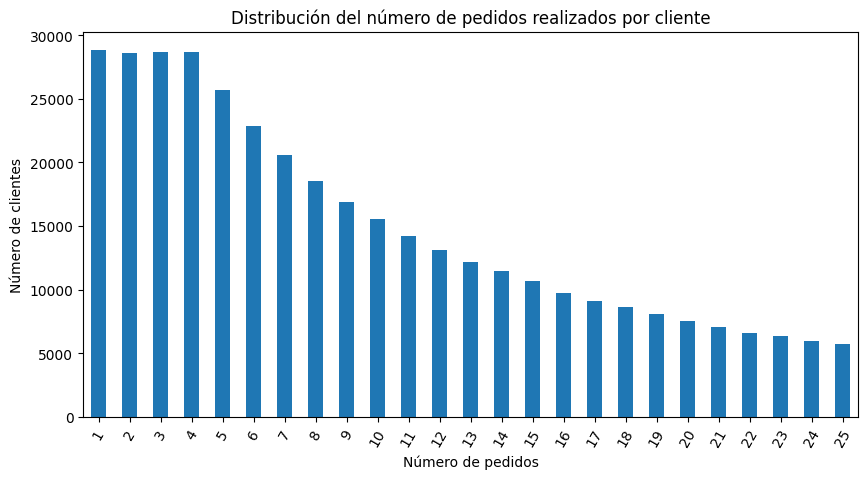

In [46]:
df_orders_by_costumer.plot(kind = 'bar',
                           title = 'Distribución del número de pedidos realizados por cliente',
                           xlabel = 'Número de pedidos',
                           ylabel = 'Número de clientes',
                           rot = 60,
                           figsize = [10,5]
           )

plt.show()

df_orders_by_costumer[df_orders_by_costumer.index < 26].plot(kind = 'bar',
                           title = 'Distribución del número de pedidos realizados por cliente',
                           xlabel = 'Número de pedidos',
                           ylabel = 'Número de clientes',
                           rot = 60,
                           figsize = [10,5]
           )

plt.show()

**Se observa que la mayoría de los clientes han realizado entre 1 y 5 pedidos hasta el momento.**

### 3. ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [47]:
# Visualización de DataFrames
df_order_products.info()
print()
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int32
 3   reordered          int64
dtypes: int32(1), int64(3)
memory usage: 121.4 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [48]:
# Fusión de DataFrames "df_order_products" y "df_products" para tener los nombres de los productos juntos con los "order_id"
df_ordered_products = df_order_products.merge(df_products, on = 'product_id', how = 'left' )
display(df_ordered_products)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
...,...,...,...,...,...,...,...
4545002,577211,15290,12,1,ORANGE BELL PEPPER,83,4
4545003,1219554,21914,9,0,PEANUT BUTTER & JELLY FRUIT & NUT FOOD BAR,3,19
4545004,692640,47766,4,1,ORGANIC AVOCADO,24,4
4545005,319435,691,8,1,ORGANIC PROMISE STRAWBERRY FIELDS CEREAL,121,14


In [49]:
# DataFrame agrupado y ordenado de los productos de mayor consumo a los de menor consumo. 
df_top_products = df_ordered_products.groupby(['product_name','product_id']).count().sort_values('order_id', ascending = False)
display(df_top_products.head(20)['order_id'])

product_name              product_id
BANANA                    24852         66050
BAG OF ORGANIC BANANAS    13176         53297
ORGANIC STRAWBERRIES      21137         37039
ORGANIC BABY SPINACH      21903         33971
ORGANIC HASS AVOCADO      47209         29773
ORGANIC AVOCADO           47766         24689
LARGE LEMON               47626         21495
STRAWBERRIES              16797         20018
LIMES                     26209         19690
ORGANIC WHOLE MILK        27845         19600
ORGANIC RASPBERRIES       27966         19197
ORGANIC YELLOW ONION      22935         15898
ORGANIC GARLIC            24964         15292
ORGANIC ZUCCHINI          45007         14584
ORGANIC BLUEBERRIES       39275         13879
CUCUMBER KIRBY            49683         13675
ORGANIC FUJI APPLE        28204         12544
ORGANIC LEMON             5876          12232
APPLE HONEYCRISP ORGANIC  8277          11993
ORGANIC GRAPE TOMATOES    40706         11781
Name: order_id, dtype: int64

**Se puede observar que los 20 productos más vendidos son "orgánicos".**

## Análisis final

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### 1. ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [50]:
num_items = df_order_products.groupby('order_id')['product_id'].count()
display(num_items)

order_id
4          13
9          15
11          5
19          3
20          8
           ..
3421034    17
3421053     9
3421071     5
3421077     4
3421079     1
Name: product_id, Length: 450046, dtype: int64

In [51]:
hist_val = num_items.value_counts().sort_index()
display(hist_val)

product_id
1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: count, Length: 90, dtype: int64

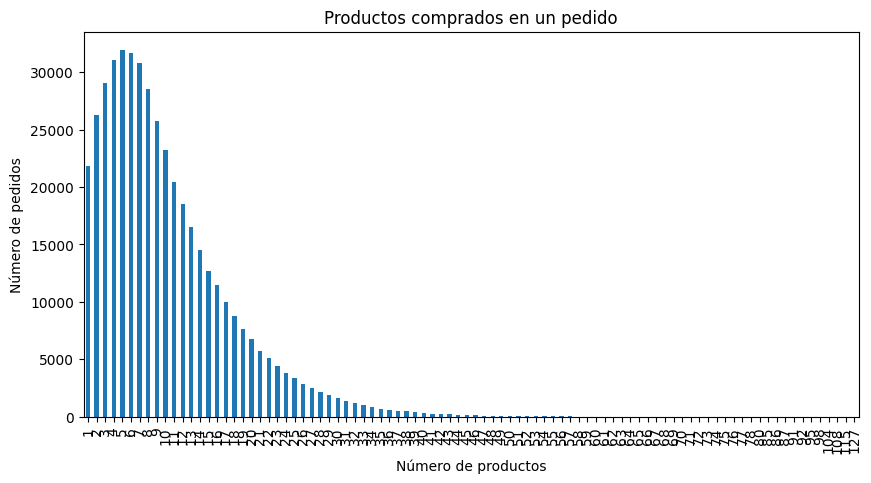

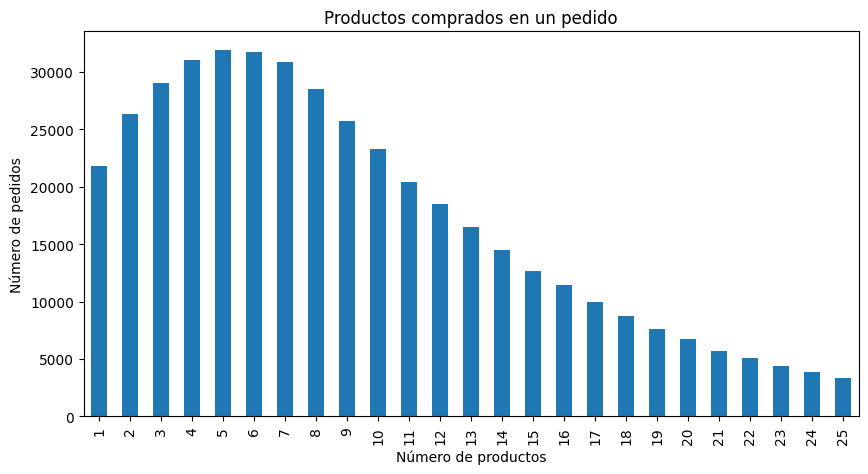

In [52]:
hist_val.plot(kind = 'bar',
             title = 'Productos comprados en un pedido',
             xlabel = 'Número de productos',
             ylabel = 'Número de pedidos',
             figsize = [10,5]
            )
plt.show()

hist_val[hist_val.index < 26].plot(kind = 'bar',
             title = 'Productos comprados en un pedido',
             xlabel = 'Número de productos',
             ylabel = 'Número de pedidos',
             figsize = [10,5]
            )
plt.show()

**Se observar que la mayoría de los pedidos oscilan en un rango de 2 - 8 productos.**

### 2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [53]:
df_products_reordered = df_order_products[df_order_products['reordered'] == 1]

In [54]:
df_merged = df_products_reordered.merge(df_products, on = 'product_id', how = 'left')
display(df_merged)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,BAG OF ICE,37,1
1,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
2,491251,8670,35,1,DICED TOMATOES,81,15
3,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16
4,2456893,21616,4,1,ORGANIC BABY ARUGULA,123,4
...,...,...,...,...,...,...,...
2683833,1622300,24852,1,1,BANANA,24,4
2683834,1125324,40600,6,1,CHEESE STUFFED CRUST PEPPERONI PIZZA,79,1
2683835,577211,15290,12,1,ORANGE BELL PEPPER,83,4
2683836,692640,47766,4,1,ORGANIC AVOCADO,24,4


In [55]:
top_products = df_merged.groupby(['product_id', 'product_name']).count().sort_values('order_id', ascending = False)
display(top_products.head(20)['order_id'])

product_id  product_name            
24852       BANANA                      55763
13176       BAG OF ORGANIC BANANAS      44450
21137       ORGANIC STRAWBERRIES        28639
21903       ORGANIC BABY SPINACH        26233
47209       ORGANIC HASS AVOCADO        23629
47766       ORGANIC AVOCADO             18743
27845       ORGANIC WHOLE MILK          16251
47626       LARGE LEMON                 15044
27966       ORGANIC RASPBERRIES         14748
16797       STRAWBERRIES                13945
26209       LIMES                       13327
22935       ORGANIC YELLOW ONION        11145
24964       ORGANIC GARLIC              10411
45007       ORGANIC ZUCCHINI            10076
49683       CUCUMBER KIRBY               9538
28204       ORGANIC FUJI APPLE           8989
8277        APPLE HONEYCRISP ORGANIC     8836
39275       ORGANIC BLUEBERRIES          8799
5876        ORGANIC LEMON                8412
49235       ORGANIC HALF & HALF          8389
Name: order_id, dtype: int64

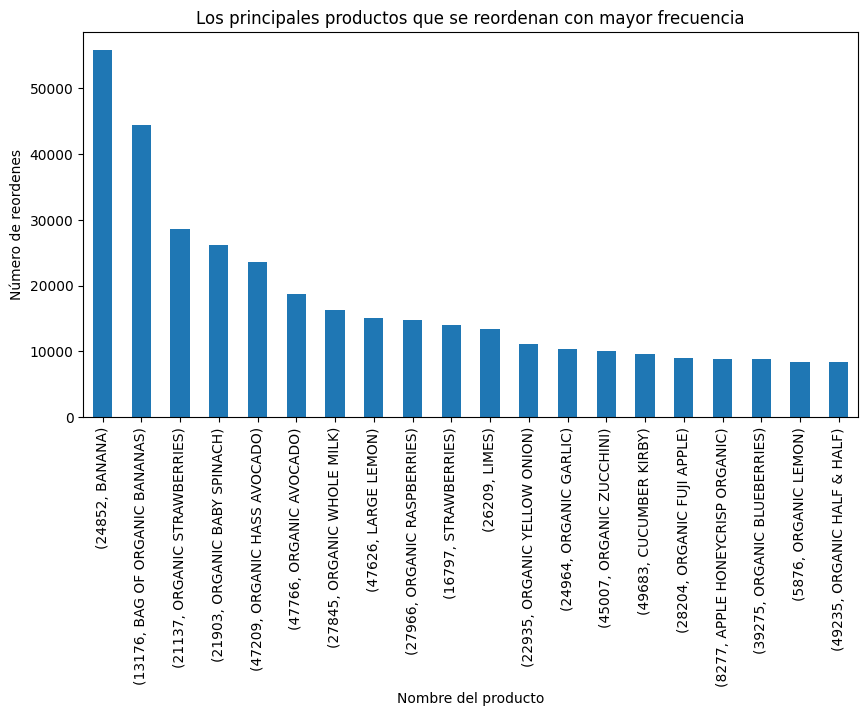

In [56]:
top_products.head(20)['order_id'].plot(kind = 'bar',
                                       title = 'Los principales productos que se reordenan con mayor frecuencia',
                                       xlabel = 'Nombre del producto',
                                       ylabel = 'Número de reordenes',
                                       figsize = [10,5]
                                      )
plt.show()

**Los clientes adoran las bananas ya que son el producto que más se vuelve a ordenar.**

### 3. Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [57]:
df_pro_merged = df_order_products.merge(df_products, on = 'product_id', how = 'left')
display(df_pro_merged.head())

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,CHICKEN BREAST TENDERS BREADED,129,1
1,567889,1560,1,1,BAG OF ICE,37,1
2,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
3,491251,8670,35,1,DICED TOMATOES,81,15
4,2571142,1940,5,1,ORGANIC 2% REDUCED FAT MILK,84,16


In [58]:
reordered_products_times = df_pro_merged.groupby(['product_id', 'product_name'])['order_id'].count()/478967
display(reordered_products_times.sort_values())
print(reordered_products_times[reordered_products_times == 0].count())
print(reordered_products_times[reordered_products_times > 0].count())
print(reordered_products_times[reordered_products_times == 1])

product_id  product_name                                                 
37535       VOLUMINOUS EXTRA-VOLUME COLLAGEN MASCARA - BLACKEST BLACK 680    0.000002
11183       GLUTEN FREE WHEAT FREE CHOCOLATE CAKE MIX                        0.000002
3719        DARK BROWN HENNA CREAM                                           0.000002
13788       SWEET TANGERINE ALL GOOD LIPS SPF 12 LIP BALM WITH CLEAR ZINC    0.000002
32383       HOMESTYLE GRAVY MIX                                              0.000002
                                                                               ...   
47209       ORGANIC HASS AVOCADO                                             0.062161
21903       ORGANIC BABY SPINACH                                             0.070926
21137       ORGANIC STRAWBERRIES                                             0.077331
13176       BAG OF ORGANIC BANANAS                                           0.111275
24852       BANANA                                                

0
45573
Series([], Name: order_id, dtype: float64)


In [59]:
reordered_products_pp = df_pro_merged.groupby(['product_id', 'product_name'])['reordered'].mean()
display(reordered_products_pp.sort_values())
print(reordered_products_pp[reordered_products_pp == 0].count())
print(reordered_products_pp[reordered_products_pp > 0].count())
print(reordered_products_pp[reordered_products_pp == 1])

product_id  product_name                                        
10244       WHOLE JALAPENO PEPPERS                                  0.0
33445       LIGHT BLUEBERRY PATCH STRAWBERRY VARIETY PACK YOGURT    0.0
11326       WHOLE HABANERO CHILE                                    0.0
11327       DEEP WOODS INSECT REPELLENT                             0.0
11329       Unknown                                                 0.0
                                                                   ... 
18041       READY TO BAKE! SNOWMAN SHAPE SUGAR COOKIES              1.0
18042       FIG- FENNEL & FLAX MANNA BREAD                          1.0
39515       Unknown                                                 1.0
18044       SUGAR FREE ENERGY DRINK ORIGINAL                        1.0
9131        ALL OCCASION NAPKINS 2-PLY PREMIUM                      1.0
Name: reordered, Length: 45573, dtype: float64

9345
36228
product_id  product_name                                 
154         CORN DOGS- MINI- HONEY CRUNCHY FLAVOR            1.0
173         HABANERO LIME SHRIMP FLAVOR RAMEN NOODLE SOUP    1.0
174         VANISHING ACNE TREATMENT CREAM                   1.0
193         FRUITWATER® STRAWBERRY KIWI SPARKLING WATER      1.0
230         VANILLA CREAM SODA                               1.0
                                                            ... 
49625       GOLDEN WHEAT DEEP CLEANSE SHAMPOO                1.0
49639       PECANS- MAPLE- PREMIUM BLEND                     1.0
49657       CABERNET TOMATOES                                1.0
49661       PORTO                                            1.0
49662       BACON CHEDDAR PRETZEL PIECES                     1.0
Name: reordered, Length: 1809, dtype: float64


**Se observa que el producto que más se pide son las bananas.**

### 4. Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [60]:
df_pro_cos_merged = df_order_products.merge(df_orders, on = 'order_id', how = 'left')
display(df_pro_cos_merged.head())

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2141543,11440,17,0,58454,25,0,15,8.0
1,567889,1560,1,1,129474,16,1,13,14.0
2,2261212,26683,1,1,47476,5,6,9,13.0
3,491251,8670,35,1,134505,27,6,13,9.0
4,2571142,1940,5,1,155995,22,5,13,5.0


In [61]:
reordered_products_pro = df_pro_cos_merged.groupby('user_id')['reordered'].mean()
display(reordered_products_pro.sort_values())

print(reordered_products_pro[reordered_products_pro == 0].count())
print(reordered_products_pro[reordered_products_pro > 0].count())

user_id
103176    0.0
84759     0.0
84742     0.0
84738     0.0
84731     0.0
         ... 
96349     1.0
117187    1.0
172837    1.0
187310    1.0
35706     1.0
Name: reordered, Length: 149626, dtype: float64

16635
132991


**Se observa que la mayoria de los clientes agrega productos que ya había comprado antes a su pedido.**

### 5. ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [62]:
df_op = df_order_products[df_order_products['add_to_cart_order'] == 1]

In [63]:
df_op_merged = df_op.merge(df_products, on = 'product_id', how = 'left')
display(df_op_merged)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,567889,1560,1,1,BAG OF ICE,37,1
1,2261212,26683,1,1,CAFE LATTE PURE LIGHTLY SWEETENED ICED COFFEE ...,91,16
2,1961225,37553,1,1,ICED COFFEE LIGHTLY SWEET,26,7
3,639939,10017,1,1,TILAPIA FILET,39,12
4,750040,8518,1,0,ORGANIC RED ONION,83,4
...,...,...,...,...,...,...,...
450041,1759009,46175,1,0,HALF BAKED® ICE CREAM,37,1
450042,115427,20842,1,1,TOTAL 0% GREEK YOGURT,120,16
450043,2049780,28576,1,1,VANILLA BEAN CHIA POD,120,16
450044,2300092,10017,1,0,TILAPIA FILET,39,12


In [64]:
top_first_products = df_op_merged.groupby(['product_id', 'product_name']).count().sort_values('order_id', ascending = False)
display(top_first_products.head(20)['order_id'])

product_id  product_name               
24852       BANANA                         15562
13176       BAG OF ORGANIC BANANAS         11026
27845       ORGANIC WHOLE MILK              4363
21137       ORGANIC STRAWBERRIES            3946
47209       ORGANIC HASS AVOCADO            3390
21903       ORGANIC BABY SPINACH            3336
47766       ORGANIC AVOCADO                 3044
19660       SPRING WATER                    2336
16797       STRAWBERRIES                    2308
27966       ORGANIC RASPBERRIES             2024
44632       SPARKLING WATER GRAPEFRUIT      1914
49235       ORGANIC HALF & HALF             1797
47626       LARGE LEMON                     1737
196         SODA                            1733
38689       ORGANIC REDUCED FAT MILK        1397
26209       LIMES                           1370
12341       HASS AVOCADOS                   1340
5785        ORGANIC REDUCED FAT 2% MILK     1310
27086       HALF & HALF                     1309
43352       RASPBERRIES      

**Se observa y se verifica que los clientes aman las bananas ya que son el primer producto añadido en sus pedidos.**

# Conclusiones

**Este proyecto me ha dado la perspectiva para ver como serán los retos a los que me enfrentaré día a día como un Data Scientist. Además, puso a prueba mis habilidades y concimientos adquiridos hasta este momento respecto al procesamiento. manipulación y visualización de datos.**